In [2]:
import pandas as pd

import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [4]:
data = pd.read_pickle('HPCC_benchmark_results/AdaBoostClassifier-hpcc_results.tsv.gz')
data_split1 = pd.DataFrame(data.Param1.str.split('=').tolist(),
                                   columns = ['Param_Name','learning_rate'])
data_split2 = pd.DataFrame(data.Param2.str.split('=').tolist(),
                                   columns = ['Param_Name','n_estimators'])
method_data1 = data.drop('Param1',1)   #delete the Parameters column from the original dataframe
method_data1 = method_data1.drop('Param2',1)
data_split1 = data_split1.drop('Param_Name',1)
data_split2 = data_split2.drop('Param_Name',1)

idx = data_split1.index.get_values()              #get the index of the parameter dataframe  
#idx
method_data2 = method_data1.set_index(idx)         #set the index of method dataframe same as parameter dataframe
#kneighbor_data2
data = pd.concat([method_data2, data_split1, data_split2], axis = 1)    #finally add the parameter columns to get the result (desired format)
#result

# You must cast the data as a float type -- it was parsed into a string type
data['learning_rate'] = data['learning_rate'].astype(float)
data['n_estimators'] = data['n_estimators'].astype(float)

data.head()

,Dataset_Name,Method_Name,Test_Score,learning_rate,n_estimators
0,trains,AdaBoostClassifier,0.5,0.01,10
1,trains,AdaBoostClassifier,0.5,0.01,10
2,trains,AdaBoostClassifier,0.5,0.01,10
3,trains,AdaBoostClassifier,0.5,0.01,10
4,trains,AdaBoostClassifier,0.5,0.01,10


In [5]:
data.shape

(10500, 5)

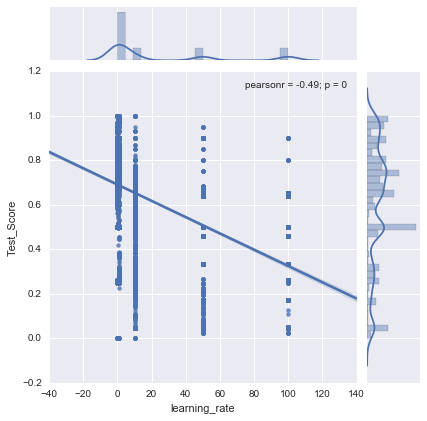

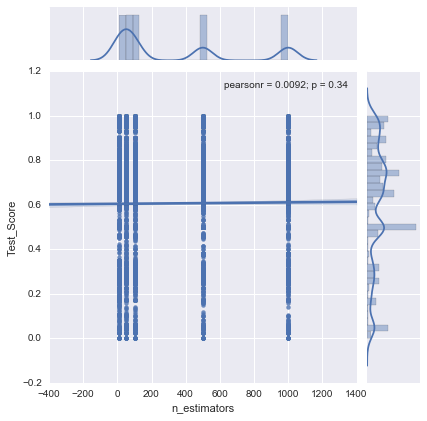

In [7]:
import seaborn as sb

plt.figure()
sb.jointplot(data=data, kind='reg', x='learning_rate', y='Test_Score')

plt.figure()
sb.jointplot(data=data, kind='reg', x='n_estimators', y='Test_Score')

In [29]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lr = smf.ols(formula='Test_Score ~ learning_rate', data=data).fit()
ne = smf.ols(formula='Test_Score ~ n_estimators', data=data).fit()
# print the coefficients
lr.params
ne.params

Intercept       0.603914
n_estimators    0.000007
dtype: float64

In [30]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'learning_rate': [0.01]})
X_new_ne = pd.DataFrame({'n_estimators': [500]})
X_new.head()
X_new_ne.head()

,n_estimators
0,0.01


In [32]:
# use the model to make predictions on a new value
#lr.predict(X_new)
ne.predict(X_new_ne)

array([ 0.60391404])

In [33]:
# create a DataFrame with the minimum and maximum values of TV
#X_new = pd.DataFrame({'learning_rate': [data.learning_rate.min(), data.learning_rate.max()]})
#X_new.head()
X_new_ne = pd.DataFrame({'n_estimators': [data.n_estimators.min(), data.n_estimators.max()]})
X_new_ne.head()

,n_estimators
0,10
1,1000


In [34]:
# make predictions for those x values and store them
#preds = lm.predict(X_new)
#preds
preds = ne.predict(X_new_ne)
preds

array([ 0.60397976,  0.61049223])

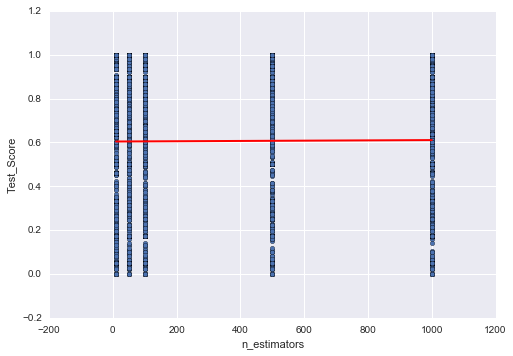

In [35]:
# first, plot the observed data
#data.plot(kind='scatter', x='learning_rate', y='Test_Score')

# then, plot the least squares line
#plt.plot(X_new, preds, c='red', linewidth=2)

# first, plot the observed data
data.plot(kind='scatter', x='n_estimators', y='Test_Score')

# then, plot the least squares line
plt.plot(X_new_ne, preds, c='red', linewidth=2)

In [36]:
# print the confidence intervals for the model coefficients
#lr.conf_int()
# print the confidence intervals for the model coefficients
ne.conf_int()

,0,1
Intercept,0.597076,0.610751
n_estimators,-0.000007,0.000020


In [37]:
# print the p-values for the model coefficients
#lr.pvalues
# print the p-values for the model coefficients
ne.pvalues

Intercept       0.000000
n_estimators    0.343315
dtype: float64

In [38]:
# print the R-squared value for the model
#lr.rsquared
# print the R-squared value for the model
ne.rsquared

8.5541670056810126e-05

In [40]:
# create a fitted model with all two features
lm = smf.ols(formula='Test_Score ~ learning_rate + n_estimators + learning_rate * n_estimators', data=data).fit()

# print the coefficients
lm.params

Intercept                     6.877868e-01
learning_rate                -3.632881e-03
n_estimators                  8.378367e-06
learning_rate:n_estimators   -7.797016e-08
dtype: float64

In [41]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Test_Score   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     1079.
Date:                Sun, 13 Mar 2016   Prob (F-statistic):               0.00
Time:                        11:38:09   Log-Likelihood:                 327.03
No. Observations:               10500   AIC:                            -646.1
Df Residuals:                   10496   BIC:                            -617.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      0.6878      0.004    189.207      0.000         0.681     0.695
learning_rate                 -0.0036   8.57e-05    -42.403      0.000        -0.004    -0.003
n_estimators                8.378e-06   7.23e-06      1.158      0.247      -5.8e-06  2.26e-05
learning_rate:n_estimators -7.797e-08    1.7e-07     -0.457      0.647     -4.12e-07  2.56e-07
==============================================================================
Omnibus:                      595.207   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.150
Skew:                          -0.633   Prob(JB):                    3.39e-153
Kurtosis:                       2.986   Cond. No.                     3.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""